## MG-GY 8401: Programming for Business Intelligence and Analytics
### Lecture 5

We will take a look at some components of the `pandas` package

1. Selecting Entries
1. Filtering Records
1. Summarizing Values
1. Joining Tables

Note that Python has several versions. We will be using **Python 3.7**.

In [1]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 9)

plt.rcParams['figure.figsize'] = (10,8)

In [5]:
pd.read_csv(sep = "\t")
pd.read_csv(sep = "\s+") #whitespace for multi times

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [16]:
my_df = pd.DataFrame({"a":[1,2,3],"b":[3,4,5]})

In [17]:
my_df["a"]

0    1
1    2
2    3
Name: a, dtype: int64

In [18]:
my_df[["a"]]

,a
0,1
1,2
2,3


In [19]:
my_df[["a","b"]]

,a,b
0,1,3
1,2,4
2,3,5


In [11]:
my_dict = {"a":[1,2],"b":[3,4]}
my_dict["a"]

[1, 2]

In [21]:
my_df2 = pd.DataFrame(my_dict)
my_df2
#my_df.set_index()

,a,b
0,1,3
1,2,4


In [31]:
my_df2.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [32]:
my_df2.loc[my_df2["a"] > 1,"b"] 

1    4
Name: b, dtype: int64

In [24]:
my_array = np.arange(1,10).reshape(3,3).transpose()
my_array

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [28]:
print(my_array[0,0])
my_array[[True, False, True],2] #filting the rows

1


array([7, 9])

### Loading Data from Files

Pandas different file formats. You can see the available functions for loading data by typing "pd.re" and pressing tab. Here we will use `read_csv`. 

In [2]:
presidents = pd.read_csv("presidents.csv")
elections = pd.read_csv("elections.csv")

We can use the head command to return only a few rows of a dataframe.

In [3]:
elections.head(3)

,Year of election,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927


There is also a tail command.

In [4]:
presidents.tail(3)

,President,Order,Birth Year,Entering Year,Exiting Year
42,George W. Bush,43,1946,2001,2009
43,Bill Clinton,42,1946,1993,2001
44,Barack H. Obama,44,1961,2009,2017


Note that these command will not give us records at random. If we want to randomly select records, then we need to use `sample`.

In [5]:
elections.sample(3)

,Year of election,Candidate,Party,Popular vote,Result,%
173,2016,Donald Trump,Republican,62984828,win,46.407862
36,1880,James Garfield,Republican,4453337,win,48.369234
18,1852,John P. Hale,Free Soil,155210,loss,4.930283


The read_csv command lets us specify a column to use an index. For example, we could have used `Order` as the index of `presidents.csv`.

In [6]:
presidents_order_index = pd.read_csv("presidents.csv", index_col = "Order")
presidents_order_index

,President,Birth Year,Entering Year,Exiting Year
Order,,,,
1,George Washington,1732,1789,1797
2,John Adams,1735,1797,1801
3,Thomas Jefferson,1743,1801,1809
4,James Madison,1751,1809,1817
5,James Monroe,1758,1817,1825
...,...,...,...,...
39,Jimmy Carter,1924,1977,1981
45,Donald Trump,1946,2017,2020
43,George W. Bush,1946,2001,2009


Alternately, we could have used the set_index commmand.

In [7]:
presidents_order_index = presidents.set_index("Order")
presidents_order_index

,President,Birth Year,Entering Year,Exiting Year
Order,,,,
1,George Washington,1732,1789,1797
2,John Adams,1735,1797,1801
3,Thomas Jefferson,1743,1801,1809
4,James Madison,1751,1809,1817
5,James Monroe,1758,1817,1825
...,...,...,...,...
39,Jimmy Carter,1924,1977,1981
45,Donald Trump,1946,2017,2020
43,George W. Bush,1946,2001,2009


Like many `pandas` function, the function `set_index` does not modify the table. 

In [8]:
presidents.head(3) 

,President,Order,Birth Year,Entering Year,Exiting Year
0,George Washington,1,1732,1789,1797
1,John Adams,2,1735,1797,1801
2,Thomas Jefferson,3,1743,1801,1809


You can compare to the difference between __views__ and __copies__ in `numpy`.

In [9]:
presidents.set_index("Order", inplace = True) 
presidents

,President,Birth Year,Entering Year,Exiting Year
Order,,,,
1,George Washington,1732,1789,1797
2,John Adams,1735,1797,1801
3,Thomas Jefferson,1743,1801,1809
4,James Madison,1751,1809,1817
5,James Monroe,1758,1817,1825
...,...,...,...,...
39,Jimmy Carter,1924,1977,1981
45,Donald Trump,1946,2017,2020
43,George W. Bush,1946,2001,2009


If we want to change the table, then we need to use the argument "inplace".

In [10]:
presidents.reset_index(inplace=True)
presidents

,Order,President,Birth Year,Entering Year,Exiting Year
0,1,George Washington,1732,1789,1797
1,2,John Adams,1735,1797,1801
2,3,Thomas Jefferson,1743,1801,1809
3,4,James Madison,1751,1809,1817
4,5,James Monroe,1758,1817,1825
...,...,...,...,...,...
40,39,Jimmy Carter,1924,1977,1981
41,45,Donald Trump,1946,2017,2020
42,43,George W. Bush,1946,2001,2009
43,42,Bill Clinton,1946,1993,2001


While we may have duplicate records, we can distinguish rows with the index. By contract, we need to have unique column names. For example, if we try to read in a file with duplicate column names, then `pandas` will automatically rename any duplicates.

### Selecting Entries

We can use brackets to select different components of a DataFrame. 

#### Selecting Columns

If we provide a string indicating a column, then we get a Series containing the corresponding column.

In [11]:
elections["Candidate"]

0         Andrew Jackson
1      John Quincy Adams
2         Andrew Jackson
3      John Quincy Adams
4         Andrew Jackson
             ...        
173         Donald Trump
174        Evan McMullin
175         Gary Johnson
176      Hillary Clinton
177           Jill Stein
Name: Candidate, Length: 178, dtype: object

If we provide a list of strings indicating many columns, then we get a DataFrame containing the corresponding columns. 

In [12]:
elections[["Candidate", "Party"]]

,Candidate,Party
0,Andrew Jackson,Democratic-Republican
1,John Quincy Adams,Democratic-Republican
2,Andrew Jackson,Democratic
3,John Quincy Adams,National Republican
4,Andrew Jackson,Democratic
...,...,...
173,Donald Trump,Republican
174,Evan McMullin,Independent
175,Gary Johnson,Libertarian
176,Hillary Clinton,Democratic


When a list contain a single entry, we still obtain a DataFrame. 

In [13]:
elections[["Candidate"]]

,Candidate
0,Andrew Jackson
1,John Quincy Adams
2,Andrew Jackson
3,John Quincy Adams
4,Andrew Jackson
...,...
173,Donald Trump
174,Evan McMullin
175,Gary Johnson
176,Hillary Clinton


Since Series and DataFrames support slightly different operations, we sometimes want a DataFrame rather than a Series. 

Note that we can use the function `to_frame` to convert a Series into a DataFrame.

In [14]:
elections["Candidate"].to_frame()

,Candidate
0,Andrew Jackson
1,John Quincy Adams
2,Andrew Jackson
3,John Quincy Adams
4,Andrew Jackson
...,...
173,Donald Trump
174,Evan McMullin
175,Gary Johnson
176,Hillary Clinton


#### Selecting Rows

If we want to select __adjacent__ rows, then we can indicate a range of numbers for the bracket operator.

In [15]:
presidents_order_index[0:3]

,President,Birth Year,Entering Year,Exiting Year
Order,,,,
1,George Washington,1732,1789,1797
2,John Adams,1735,1797,1801
3,Thomas Jefferson,1743,1801,1809


If we forget to indicate a range of values, then `pandas` will assume that we want a column. 

In [16]:
# this code will raise a KeyError

# presidents_order_index[0] 

#### Selecting Entries

If we want to select entries from specific rows and columns, then we use 

- `loc`
- `iloc`

Commonly, we use `loc` instead of `iloc` because `loc` is more versatile than `iloc`.

#### Using loc

In [17]:
presidents.loc[[0, 2, 4], ['President','Entering Year', 'Birth Year']]

,President,Entering Year,Birth Year
0,George Washington,1789,1732
2,Thomas Jefferson,1801,1743
4,James Monroe,1817,1758


Since `loc` refers to the index, we would need to change the specification of rows for `presidents_order_index`

In [18]:
# this code will generate missing values

# presidents_order_index.loc[[0, 2, 4], ['President','Entering Year', 'Birth Year']]

Note that we can specify a range of values with a slice. However we have a different behavior of slicing for `loc`. We include the last value rather than exclude the last value.

In [19]:
presidents.loc[0:5, ['President','Entering Year', 'Birth Year']]

,President,Entering Year,Birth Year
0,George Washington,1789,1732
1,John Adams,1797,1735
2,Thomas Jefferson,1801,1743
3,James Madison,1809,1751
4,James Monroe,1817,1758
5,Andrew Jackson,1829,1767


If we provide a string for the column instead of a list of strings, then we get a Series.

In [20]:
presidents.loc[0:5, 'President']

0    George Washington
1           John Adams
2     Thomas Jefferson
3        James Madison
4         James Monroe
5       Andrew Jackson
Name: President, dtype: object

Similarly if we specify an index for the row instead of a list of indices, then we get a Series.

In [21]:
presidents.loc[0, ['President','Entering Year', 'Birth Year']]

President        George Washington
Entering Year                 1789
Birth Year                    1732
Name: 0, dtype: object

If we indicate an index and a string, then we get the value of the entry.

In [22]:
presidents.loc[0, 'President']

'George Washington'

If we omit the second argument to the bracket operator, then by default we retrieve all columns of the table. 

In [23]:
presidents.loc[[0, 2, 4]]

,Order,President,Birth Year,Entering Year,Exiting Year
0,1,George Washington,1732,1789,1797
2,3,Thomas Jefferson,1743,1801,1809
4,5,James Monroe,1758,1817,1825


#### Using iloc

While we can use `iloc` to access entries, we must indicate the position in the table with numbers. 

In [24]:
presidents.iloc[0:3, 0:2]

,Order,President
0,1,George Washington
1,2,John Adams
2,3,Thomas Jefferson


We have the standard behavior of slicing for `iloc`. We exclude the last value rather than include the last value.

In [25]:
presidents.iloc[0, 0:2]

Order                        1
President    George Washington
Name: 0, dtype: object

Note that `iloc` is less versatile than `loc`

1. We tend to make mistakes with `iloc` because we have to count the position in the table.
2. The code for `loc` is more understandable to us because we see the labels for rows and columns
3. If we permutate the order of rows or columns, then the code for `iloc` will be wrong.

However, `iloc` is sometimes more convenient than `loc`

### Filtering Records

Remember that we could filter `numpy` arrays with the boolean values. The value `False` would mask an entry. 

The bracket operator supports booleans value. 

In [26]:
first_three_presidents = presidents.iloc[0:3, 0:2].copy()
first_three_presidents

,Order,President
0,1,George Washington
1,2,John Adams
2,3,Thomas Jefferson


Note that we can use `copy` to make a copy of the table.

In [27]:
first_three_presidents[[False, True, True]]

,Order,President
1,2,John Adams
2,3,Thomas Jefferson


We selected rows of `first_three_presidents`. We need to specify a container with a boolean value for each row. 

We can use broadcasting to determine the container of boolean values.

In [28]:
iswin = elections['Result'] == 'win'
iswin

0      False
1       True
2       True
3      False
4       True
       ...  
173     True
174    False
175    False
176    False
177    False
Name: Result, Length: 178, dtype: bool

We obtain a Series same index. However the entries are either `True` or `False` depending on the value of the entry in the `Result` column. 

Now we can use the Serires to filter the `elections` table.

In [29]:
elections[iswin]

,Year of election,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
8,1836,Martin Van Buren,Democratic,763291,win,52.272472
11,1840,William Henry Harrison,Whig,1275583,win,53.051213
...,...,...,...,...,...,...
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484


We can combine the two steps into one step.

In [30]:
elections[elections['Result'] == 'win']

,Year of election,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
8,1836,Martin Van Buren,Democratic,763291,win,52.272472
11,1840,William Henry Harrison,Whig,1275583,win,53.051213
...,...,...,...,...,...,...
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484


If we want to have multiple logical expressions, then we can combine them with the operators 

- `&` for an
- `|` for or
- `~` for not

The keywords `and`, `or` and `not` will not work for combining logical expressions.

In [31]:
win_or_greater_50 = (elections['Result'] == 'win') | (elections['%'] < 50)

In [32]:
win_less_50 = (elections['Result'] == 'win') & (elections['%'] < 50)

In [33]:
win_greater_50 = (elections['Result'] == 'win') & ~(elections['%'] < 50)

Note that we can use boolean values with `loc` to filter rows and columns.

In [37]:
elections.loc[:,[False, True,True, False, False, True]]

,Candidate,Party,%
0,Andrew Jackson,Democratic-Republican,57.210122
1,John Quincy Adams,Democratic-Republican,42.789878
2,Andrew Jackson,Democratic,56.203927
3,John Quincy Adams,National Republican,43.796073
4,Andrew Jackson,Democratic,54.574789
...,...,...,...
173,Donald Trump,Republican,46.407862
174,Evan McMullin,Independent,0.539546
175,Gary Johnson,Libertarian,3.307714
176,Hillary Clinton,Democratic,48.521539


### Summarizing Values 

We have many approaches to summarizing values in tables. Here we will focus on four functions 

- `unique`
- `isin`
- `sort_values`
- `mean`

In [38]:
elections["Year of election"].unique()

array([1824, 1828, 1832, 1836, 1840, 1844, 1848, 1852, 1856, 1860, 1864,
       1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908,
       1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952,
       1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996,
       2000, 2004, 2008, 2012, 2016], dtype=int64)

Just like the `numpy` package, the `pandas` package supports `unique` to determine distinct values.

In [39]:
elections["Party"].isin(["Democratic", "Republican"])

0      False
1      False
2       True
3      False
4       True
       ...  
173     True
174    False
175    False
176     True
177    False
Name: Party, Length: 178, dtype: bool

Commonly we can simplify logical expressions with the function `isin`. Contrast to the following logical expression.

In [40]:
party_democrat_or_republican = (elections['Party'] == 'Republican') | (elections['Party'] == "Democratic")

We can sort values with the function `sort_values`.

In [41]:
elections.sort_values("%")

,Year of election,Candidate,Party,Popular vote,Result,%
156,2004,David Cobb,Green,119859,loss,0.098088
141,1992,Bo Gritz,Populist,106152,loss,0.101918
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
...,...,...,...,...,...,...
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
79,1920,Warren Harding,Republican,16144093,win,60.574501
120,1972,Richard Nixon,Republican,47168710,win,60.907806
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107


By default the values are in ascending order.

In [42]:
elections.sort_values("%", ascending=False)

,Year of election,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
...,...,...,...,...,...,...
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Note that `sort_values` doe not change the table. 

We can use `numpy` functions meant for 1-dimensional arrays on Series and `numpy` functions meant for 2-dimensional arrays on DataFrames. 

In [43]:
average_percentage = np.sum(elections["%"]) / len(elections["%"])
average_percentage

27.52808988765169

Alternatively we can use `pandas` functions.

In [44]:
elections["%"].mean()

27.52808988765169

### Join Tables

If we want to link records between tables, then we can use the `pandas` function `merge` to perform a join operation.

In [45]:
elections_presidents_join = inner = pd.merge(left = elections, 
                                             right = presidents, 
                                             left_on = "Candidate", 
                                             right_on = "President")

Note that `pandas` has a `join` function. However, we tend to use `merge` instead of `join` because `merge` is more versatile.`

In [46]:
elections_presidents_join.sort_values("Year of election")

,Year of election,Candidate,Party,Popular vote,...,President,Birth Year,Entering Year,Exiting Year
0,1824,Andrew Jackson,Democratic-Republican,151271,...,Andrew Jackson,1767,1829,1837
3,1824,John Quincy Adams,Democratic-Republican,113142,...,John Quincy Adams,1767,1825,1829
1,1828,Andrew Jackson,Democratic,642806,...,Andrew Jackson,1767,1829,1837
4,1828,John Quincy Adams,National Republican,500897,...,John Quincy Adams,1767,1825,1829
2,1832,Andrew Jackson,Democratic,702735,...,Andrew Jackson,1767,1829,1837
...,...,...,...,...,...,...,...,...,...
43,1992,Bill Clinton,Democratic,44909806,...,Bill Clinton,1946,1993,2001
44,1996,Bill Clinton,Democratic,47400125,...,Bill Clinton,1946,1993,2001
45,2000,George W. Bush,Republican,50456002,...,George W. Bush,1946,2001,2009
46,2004,George W. Bush,Republican,62040610,...,George W. Bush,1946,2001,2009


By default, the `merge` function uses an inner join. So the joined table contains rows that have names in both `elections` and `presidents`.  

For example, presidents before 1824 do not appear in the joined table because there was no popular vote before 1824.

In [47]:
elections_presidents_join[elections_presidents_join["Year of election"] < 1824]

,Year of election,Candidate,Party,Popular vote,...,President,Birth Year,Entering Year,Exiting Year


If we wanted to include all rows from `presidents`, then we would need to use a right join. 

In [48]:
elections_presidents_right_join = inner = pd.merge(left = elections,
                                                   how = "right",
                                                   right = presidents, 
                                                   left_on = "Candidate", 
                                                   right_on = "President")

elections_presidents_right_join.sort_values("Year of election")

,Year of election,Candidate,Party,Popular vote,...,President,Birth Year,Entering Year,Exiting Year
5,1824.0,Andrew Jackson,Democratic-Republican,151271.0,...,Andrew Jackson,1767,1829,1837
8,1824.0,John Quincy Adams,Democratic-Republican,113142.0,...,John Quincy Adams,1767,1825,1829
6,1828.0,Andrew Jackson,Democratic,642806.0,...,Andrew Jackson,1767,1829,1837
9,1828.0,John Quincy Adams,National Republican,500897.0,...,John Quincy Adams,1767,1825,1829
7,1832.0,Andrew Jackson,Democratic,702735.0,...,Andrew Jackson,1767,1829,1837
...,...,...,...,...,...,...,...,...,...
48,NaN,NaN,NaN,NaN,...,Harry S. Truman,1884,1945,1953
49,NaN,NaN,NaN,NaN,...,Dwight D. Eisenhower,1890,1953,1961
50,NaN,NaN,NaN,NaN,...,Lyndon B. Johnson,1908,1963,1969
57,NaN,NaN,NaN,NaN,...,John F. Kennedy,1917,1961,1963


We learn that several presidents are missing in the inner join. While presidents like `John F. Kennedy` appear in the `elections`, we have the record under `John Kennedy` 

We can process the data to avoid the discrepancy.

In [49]:
def remove_middle_initial(name):
    name_split = name.split(" ")
    return name_split[0] + " " + name_split[-1]

In [50]:
remove_middle_initial("John F. Kennedy")

'John Kennedy'

Having defined a function, we can apply it to the entries of the column.

In [51]:
president_names_without_middle_initial = []

for name in presidents["President"]:
    president_names_without_middle_initial.append(remove_middle_initial(name))

Alternatively, we could vectorize the function to apply it to the column.

In [52]:
remove_middle_initial_vectorize = np.vectorize(remove_middle_initial)

remove_middle_initial_vectorize(presidents["President"])

array(['George Washington', 'John Adams', 'Thomas Jefferson',
       'James Madison', 'James Monroe', 'Andrew Jackson', 'John Adams',
       'William Harrison', 'Martin Buren', 'Zachary Taylor', 'John Tyler',
       'James Buchanan', 'James Polk', 'Millard Fillmore',
       'Franklin Pierce', 'Andrew Johnson', 'Abraham Lincoln',
       'Ulysses Grant', 'Rutherford Hayes', 'Chester Arthur',
       'James Garfield', 'Benjamin Harrison', 'Grover Cleveland',
       'Grover Cleveland', 'William McKinley', 'Woodrow Wilson',
       'William Taft', 'Theodore Roosevelt', 'Warren Harding',
       'Calvin Coolidge', 'Herbert Hoover', 'Franklin Roosevelt',
       'Harry Truman', 'Dwight Eisenhower', 'Lyndon Johnson',
       'Ronald Reagan', 'Richard Nixon', 'Gerald Ford', 'John Kennedy',
       'George Bush', 'Jimmy Carter', 'Donald Trump', 'George Bush',
       'Bill Clinton', 'Barack Obama'], dtype='<U18')

Now we can modify the `President` column.

In [53]:
presidents["President"] = president_names_without_middle_initial

Note that we need to update two pairs of presidents 

- Adams
- Bush


In [54]:
presidents.loc[presidents["Order"] == 41, "President"] = "George H. W. Bush"

presidents.loc[presidents["Order"] == 43, "President"] = "George W. Bush"

presidents.loc[presidents["Order"] == 6, "President"] = "John Quincy Adams"

Now we can update the inner join.

In [55]:
elections_presidents_join = inner = pd.merge(left = elections, 
                                             right = presidents, 
                                             left_on = "Candidate", 
                                             right_on = "President")

elections_presidents_join.sort_values("Year of election")

,Year of election,Candidate,Party,Popular vote,...,President,Birth Year,Entering Year,Exiting Year
0,1824,Andrew Jackson,Democratic-Republican,151271,...,Andrew Jackson,1767,1829,1837
3,1824,John Quincy Adams,Democratic-Republican,113142,...,John Quincy Adams,1767,1825,1829
1,1828,Andrew Jackson,Democratic,642806,...,Andrew Jackson,1767,1829,1837
4,1828,John Quincy Adams,National Republican,500897,...,John Quincy Adams,1767,1825,1829
2,1832,Andrew Jackson,Democratic,702735,...,Andrew Jackson,1767,1829,1837
...,...,...,...,...,...,...,...,...,...
57,2000,George W. Bush,Republican,50456002,...,George W. Bush,1946,2001,2009
58,2004,George W. Bush,Republican,62040610,...,George W. Bush,1946,2001,2009
59,2008,Barack Obama,Democratic,69498516,...,Barack Obama,1961,2009,2017
60,2012,Barack Obama,Democratic,65915795,...,Barack Obama,1961,2009,2017


Note that  `Andrew Jackson` occurs three times in the `election` table and one time in the `presidents` table. So `Andrew Jackson` appears three times in the output. 

However, `Grover Cleveland` occurs three times in the `election` table and two times in the `presidents` table. So `Grover Cleveland` appears six times in the output. 

In [56]:
presidents["Entering Year Minus One"] = presidents["Entering Year"] - 1

We can join on the name of the president and the year of inauguration.

In [57]:
elections_presidents_join = inner = pd.merge(left = elections, 
                                             right = presidents, 
                                             left_on = ["Candidate", "Year of election"], 
                                             right_on = ["President", "Entering Year Minus One"])

elections_presidents_join.sort_values("Year of election")

,Year of election,Candidate,Party,Popular vote,...,Birth Year,Entering Year,Exiting Year,Entering Year Minus One
0,1824,John Quincy Adams,Democratic-Republican,113142,...,1767,1825,1829,1824
1,1828,Andrew Jackson,Democratic,642806,...,1767,1829,1837,1828
2,1844,James Polk,Democratic,1339570,...,1795,1845,1849,1844
3,1848,Zachary Taylor,Whig,1360235,...,1784,1849,1850,1848
4,1852,Franklin Pierce,Democratic,1605943,...,1804,1853,1857,1852
...,...,...,...,...,...,...,...,...,...
24,1988,George H. W. Bush,Republican,48886597,...,1924,1989,1993,1988
25,1992,Bill Clinton,Democratic,44909806,...,1946,1993,2001,1992
26,2000,George W. Bush,Republican,50456002,...,1946,2001,2009,2000
27,2008,Barack Obama,Democratic,69498516,...,1961,2009,2017,2008


Now that we have joined the tables, we can understand the information behind the tables.

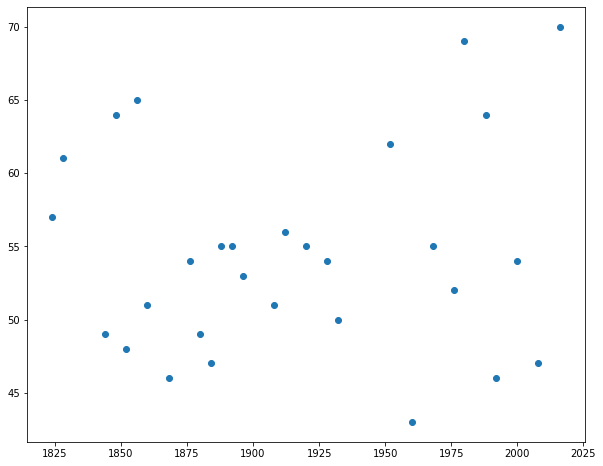

In [58]:
# filter
winners = elections_presidents_join.loc[inner["Result"] == "win",["Year of election","Birth Year"]]

# compute age
winners["Age"] = winners["Year of election"] - winners["Birth Year"]

plt.scatter(winners["Year of election"], winners["Age"]);